# Sampling in Python
Run the hidden code cell below to import the data used in this course.

In [1]:
# Importing pandas
import pandas as pd

# Importing the course arrays
attrition_pop = pd.read_feather("datasets/attrition.feather")
spotify_population = pd.read_feather("datasets/spotify_2000_2020.feather")
coffee = pd.read_feather("datasets/coffee_ratings_full.feather")

In [2]:
# Sample 1000 rows from spotify_population
spotify_sample = spotify_population.sample(n=1000)

# Print the sample
print(spotify_sample)

# Calculate the mean duration in mins from spotify_population
mean_dur_pop = spotify_population.duration_minutes.mean()

# Calculate the mean duration in mins from spotify_sample
mean_dur_samp = spotify_sample.duration_minutes.mean()

# Print the means
print(mean_dur_pop)
print(mean_dur_samp)

       acousticness  ...    year
8912       0.431000  ...  2005.0
35746      0.000007  ...  2002.0
32390      0.025000  ...  2011.0
4560       0.077800  ...  2003.0
11234      0.137000  ...  2007.0
...             ...  ...     ...
22560      0.015300  ...  2017.0
7140       0.480000  ...  2008.0
17938      0.080300  ...  2012.0
8906       0.977000  ...  2005.0
9929       0.378000  ...  2015.0

[1000 rows x 20 columns]
3.8521519140900073
3.83226385


In [3]:
# Create a pandas Series from the loudness column of spotify_population
loudness_pop = spotify_population['loudness']

# Sample 100 values of loudness_pop
loudness_samp = loudness_pop.sample(n=100)

# Calculate the mean of loudness_pop
mean_loudness_pop = loudness_pop.mean()

# Calculate the mean of loudness_samp
mean_loudness_samp = loudness_samp.mean()

# Print the means
print(mean_loudness_pop)
print(mean_loudness_samp)

-7.366856851353947
-7.330090000000001


### Pseudo Random Number Generation

![image](image.png)


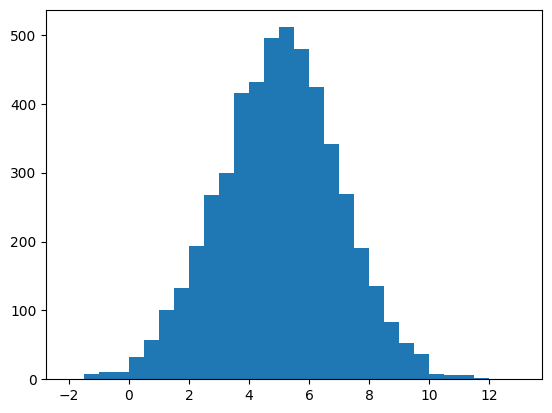

In [4]:
import numpy as np
import matplotlib.pyplot as plt
# Generate random numbers from a Normal(5, 2)
normals = np.random.normal(loc=5, scale=2, size=5000)

# Plot a histogram of normal values, binwidth 0.5
plt.hist(x=normals,bins=np.arange(-2,13.5,0.5))
plt.show()

# Sampling Methods

### Simple random and systematic sampling

In [5]:
#simple random sampling
coffee.sample(n=5,random_state=123)

,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,region,producer,number_of_bags,bag_weight,in_country_partner,harvest_year,grading_date,owner_1,variety,processing_method,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,cupper_points,moisture,category_one_defects,quakers,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
650,82.58,Arabica,organizaciones de productores de cafe colimense,Mexico,la timbuchera; el ocotito y la hortaliza,None,beneficio cafetaleros del arrayanal,703815218; 703815215; 703815197,organizaciones de productores de cafe colimens...,1150,colima,FEDERICO ENCISO MICHEL; LEODAN ENCISO FIGUEROA...,70.0,1 kg,AMECAFE,2012,"July 2nd, 2012",ORGANIZACIONES DE PRODUCTORES DE CAFE COLIMENSE,Typica,Washed / Wet,7.67,7.58,7.58,7.75,7.67,6.83,10.0,10.0,10.0,7.50,0.12,0.0,0.0,Green,0.0,"July 2nd, 2013",AMECAFE,59e396ad6e22a1c22b248f958e1da2bd8af85272,0eb4ee5b3f47b20b049548a2fd1e7d4a2b70d0a7,m,1150.0000,1150.0000,1150.0000
319,83.67,Arabica,"lin, che-hao krude 林哲豪",Taiwan,tsoustructive garden 鄒築園,Tsoustructive 2015 Caturra,tsoustructive garden 鄒築園,Taiwan,taiwan coffee laboratory,1200,"leye, alishan township, chiayi county","FANG,ZHENG-LUN 方政倫",20.0,50 kg,Specialty Coffee Association,2015,"May 18th, 2016","Lin, Che-Hao Krude 林哲豪",Caturra,Natural / Dry,7.50,7.67,7.33,7.92,7.83,7.67,10.0,10.0,10.0,7.75,0.10,0.0,0.0,Bluish-Green,0.0,"May 18th, 2017",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1200.0000,1200.0000,1200.0000
314,83.67,Arabica,ipanema coffees,Brazil,fazenda capoeirnha,020/17,dry mill,002/1660/0080,ipanema coffees,890,south of minas,Ipanema Agricola S.A,320.0,60 kg,Brazil Specialty Coffee Association,2017 / 2018,"October 20th, 2017",Ipanema Coffees,Bourbon,Natural / Dry,7.67,7.83,7.50,7.67,7.67,7.50,10.0,10.0,10.0,7.83,0.11,0.0,0.0,Green,2.0,"October 20th, 2018",Brazil Specialty Coffee Association,3297cfa4c538e3dd03f72cc4082c54f7999e1f9d,8900f0bf1d0b2bafe6807a73562c7677d57eb980,m,890.0000,890.0000,890.0000
150,84.58,Arabica,compañia colombiana agroindustrial s.a,Colombia,None,None,trilladora agricola,3-79-0542,ecom cca sa,1550,santander,None,250.0,70 kg,Almacafé,2013,"December 20th, 2013",Compañia Colombiana Agroindustrial S.A,Caturra,Washed / Wet,7.67,7.67,7.58,7.75,7.58,8.50,10.0,10.0,10.0,7.83,0.00,0.0,0.0,None,0.0,"December 20th, 2014",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,1550.0000,1550.0000,1550.0000
336,83.58,Arabica,juan luis alvarado romero,Guatemala,finca santa clara,11/52/1170,beneficio exportacafe agua santa,11/52/1170,exportcafe,3702,huehuetenango,JUAN RAMIREZ MORALES,275.0,69 kg,Asociacion Nacional Del Café,2016,"July 5th, 2016",Juan Luis Alvarado Romero,Caturra,Washed / Wet,7.75,7.75,7.50,7.83,7.58,7.58,10.0,10.0,10.0,7.58,0.11,0.0,1.0,Green,0.0,"July 5th, 2017",Asociacion Nacional Del Café,b1f20fe3a819fd6b2ee0eb8fdc3da256604f1e53,724f04ad10ed31dbb9d260f0dfd221ba48be8a95,ft,1128.3696,1128.3696,1128.3696


In [6]:
#systematic sampling -- sample taken in defined intervals
sample_size = 5
pop_size = len(coffee)
interval = pop_size // sample_size

interval

267

In [7]:
#select every 267th row 
coffee.iloc[::interval]

,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,region,producer,number_of_bags,bag_weight,in_country_partner,harvest_year,grading_date,owner_1,variety,processing_method,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,cupper_points,moisture,category_one_defects,quakers,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,90.58,Arabica,metad plc,Ethiopia,metad plc,None,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300.0,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,None,Washed / Wet,8.67,8.83,8.67,8.75,8.50,8.42,10.00,10.00,10.00,8.75,0.12,0.0,0.0,Green,0.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
267,83.92,Arabica,federacion nacional de cafeteros,Colombia,None,None,None,01-1969,federacion nacional de cafeteros,None,huila,None,275.0,2 kg,Almacafé,2014,"March 12th, 2015",Federacion Nacional de Cafeteros,None,Washed / Wet,7.83,7.75,7.58,7.58,7.75,7.75,10.00,10.00,10.00,7.67,0.00,1.0,0.0,None,1.0,"March 11th, 2016",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,NaN,NaN,NaN
534,82.92,Arabica,consejo salvadoreño del café,El Salvador,santa josefita,1-198,beneficio cuzcachapa,09-030-273,soc. coop. cuzcachapa de r.l.,1350,apaneca,"Balcanes Coffee Estates, S.A. de C.V.",100.0,69 kg,Salvadoran Coffee Council,2017,"August 28th, 2017",Consejo Salvadoreño del Café,Bourbon,Washed / Wet,7.50,7.50,7.75,7.58,7.92,7.83,10.00,10.00,9.33,7.50,0.00,0.0,0.0,Green,1.0,"August 28th, 2018",Salvadoran Coffee Council,3d4987e3b91399dbb3938b5bdf53893b6ef45be1,27b21e368fb8291cbea02c60623fe6c98f84524d,m,1350.0,1350.0,1350.0
801,82.00,Arabica,"lin, che-hao krude 林哲豪",Taiwan,"you siang coffee farmtainan, taiwan 台灣台南優香咖啡",None,"you siang coffee farmtainan, taiwan 台灣台南優香咖啡",Taiwan,"red on tree co., ltd.",600m,"dongshan dist., tainan city 臺南市東山區",Chen Jin Lin 陳金璘,50.0,20 kg,Specialty Coffee Association,2013,"July 22nd, 2014","Lin, Che-Hao Krude 林哲豪",Typica,Washed / Wet,7.33,7.50,7.17,7.42,7.50,7.33,10.00,10.00,10.00,7.75,0.09,0.0,0.0,Green,0.0,"July 22nd, 2015",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,600.0,600.0,600.0
1068,80.50,Arabica,cqi taiwan icp cqi台灣合作夥伴,Taiwan,王秋金,1,non,None,王秋金,50,taiwan,王秋金,20.0,5 kg,Blossom Valley International,2017,"December 8th, 2017",CQI Taiwan ICP CQI台灣合作夥伴,Other,Natural / Dry,7.17,7.17,7.17,7.42,7.17,7.25,10.00,10.00,10.00,7.17,0.00,0.0,0.0,Blue-Green,0.0,"December 8th, 2018",Blossom Valley International,fc45352eee499d8470cf94c9827922fb745bf815,de73fc9412358b523d3a641501e542f31d2668b0,m,50.0,50.0,50.0
1335,77.17,Robusta,james moore,United States,fazenda cazengo,None,cafe cazengo,None,global opportunity fund,795 meters,"kwanza norte province, angola",Cafe Cazengo,1.0,1 kg,Specialty Coffee Association,2014,"December 23rd, 2014",James Moore,None,Natural / Dry,7.33,7.33,7.17,7.42,7.50,7.17,9.33,9.33,7.42,7.17,0.00,0.0,0.0,None,6.0,"December 23rd, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,795.0,795.0,795.0


### Is systematic sampling OK?

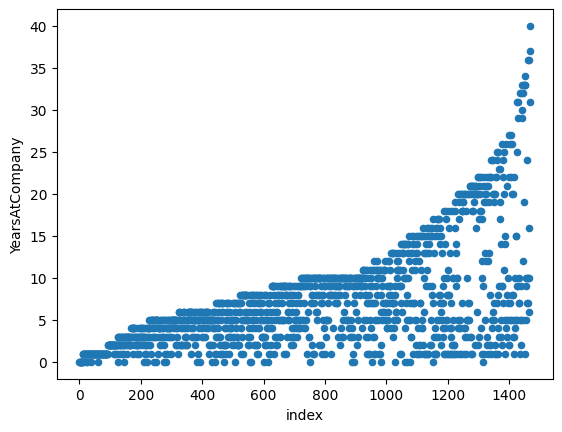

In [8]:
# Add an index column to attrition_pop
attrition_pop_id = attrition_pop.reset_index()

# Plot YearsAtCompany vs. index for attrition_pop_id
attrition_pop_id.plot(x='index',y='YearsAtCompany',kind='scatter')
plt.show()

There is a pattern in the 'YearsAtCompany' column of the dataset vs index.

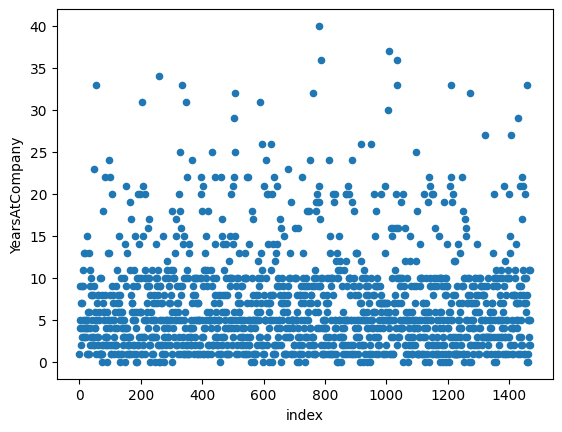

In [9]:
# Shuffle the rows of attrition_pop
attrition_shuffled = attrition_pop.sample(frac=1)

# Reset the row indexes and create an index column
attrition_shuffled = attrition_shuffled.reset_index(drop=True).reset_index()

# Plot YearsAtCompany vs. index for attrition_shuffled
attrition_shuffled.plot(y='YearsAtCompany',x='index',kind='scatter')
plt.show()

Since, there is no pattern, systematic sampling performs well to get random samples.

In [10]:
#systematic sampling from attrition_shuffled
sample_size = 70
pop_size = len(attrition_shuffled)
interval = pop_size // sample_size

attrition_shuffled.iloc[::interval]

,index,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,31,1.0,Travel_Frequently,534,Research_Development,20,Bachelor,Life_Sciences,Low,Male,66,High,3,Healthcare_Representative,High,Married,9824,22908,3,No,12,Excellent,Low,0,12,2,Better,1,0,0,0
21,21,50,1.0,Travel_Rarely,869,Sales,3,College,Marketing,Low,Male,86,Medium,1,Sales_Representative,High,Married,2683,3810,1,Yes,14,Excellent,High,0,3,2,Better,3,2,0,2
42,42,33,0.0,Travel_Rarely,1216,Sales,8,Master,Marketing,High,Male,39,High,2,Sales_Executive,High,Divorced,7104,20431,0,No,12,Excellent,Very_High,0,6,3,Better,5,0,1,2
63,63,19,1.0,Travel_Rarely,303,Research_Development,2,Bachelor,Life_Sciences,Medium,Male,47,Medium,1,Laboratory_Technician,Very_High,Single,1102,9241,1,No,22,Outstanding,High,0,1,3,Good,1,0,1,0
84,84,28,0.0,Travel_Rarely,857,Research_Development,10,Bachelor,Other,High,Female,59,High,2,Research_Scientist,High,Single,3660,7909,3,No,13,Excellent,Very_High,0,10,4,Best,8,7,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1365,1365,49,0.0,Travel_Rarely,1313,Sales,11,Master,Marketing,Very_High,Female,80,High,2,Sales_Executive,Very_High,Single,4507,8191,3,No,12,Excellent,High,0,8,1,Best,5,1,0,4
1386,1386,35,0.0,Travel_Frequently,664,Research_Development,1,Bachelor,Medical,Medium,Male,79,High,1,Research_Scientist,Low,Married,2194,5868,4,No,13,Excellent,Very_High,1,5,2,Good,3,2,1,2
1407,1407,50,0.0,Travel_Rarely,1099,Research_Development,29,Master,Life_Sciences,Medium,Male,88,Medium,4,Manager,High,Married,17046,9314,0,No,15,Excellent,Medium,1,28,2,Better,27,10,15,7
1428,1428,60,0.0,Travel_Rarely,422,Research_Development,7,Bachelor,Life_Sciences,Low,Female,41,High,5,Manager,Low,Married,19566,3854,5,No,11,Excellent,Very_High,0,33,5,Bad,29,8,11,10


### Stratified and weighted random sampling

### Proportional stratified sampling
_Proportional stratified sampling_ results in subgroup sizes within the sample that are representative of the subgroup sizes within the population. It is equivalent to performing a simple random sample on each subgroup.

In [11]:
# Proportion of employees by Education level
education_counts_pop = attrition_pop['Education'].value_counts(normalize=True)

# Print education_counts_pop
print(education_counts_pop)

# Proportional stratified sampling for 40% of each Education group
attrition_strat = attrition_pop.groupby('Education')\
	.sample(frac=0.4, random_state=2022)

# Calculate the Education level proportions from attrition_strat
education_counts_strat = attrition_strat['Education'].value_counts(normalize=True)

# Print education_counts_strat
print(education_counts_strat)

Bachelor         0.389116
Master           0.270748
College          0.191837
Below_College    0.115646
Doctor           0.032653
Name: Education, dtype: float64
Bachelor         0.389456
Master           0.270408
College          0.192177
Below_College    0.115646
Doctor           0.032313
Name: Education, dtype: float64


### Equal counts stratified sampling
If one subgroup is larger than another subgroup in the population, but you don't want to reflect that difference in your analysis, then you can use _equal counts stratified sampling_ to generate samples where each subgroup has the same amount of data.

In [12]:
# Get 30 employees from each Education group
attrition_eq = attrition_pop.groupby('Education')\
	.sample(n=30, random_state=2022)      

# Get the proportions from attrition_eq
education_counts_eq = attrition_eq['Education'].value_counts(normalize=True)

# Print the results
print(education_counts_eq)

Below_College    0.2
College          0.2
Bachelor         0.2
Master           0.2
Doctor           0.2
Name: Education, dtype: float64


### Weighted Sampling
Stratified sampling provides rules about the probability of picking rows from your dataset at the subgroup level. A generalization of this is weighted sampling, which lets you specify rules about the probability of picking rows at the row level. The probability of picking any given row is proportional to the weight value for that row.

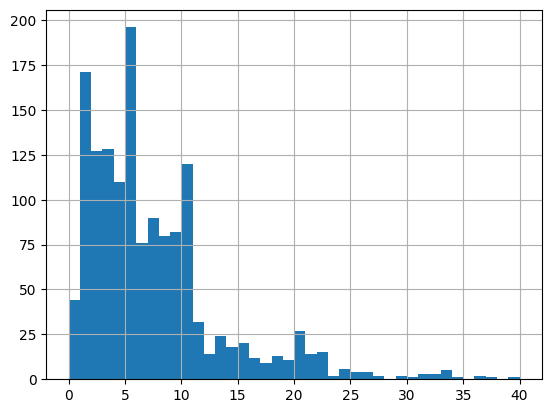

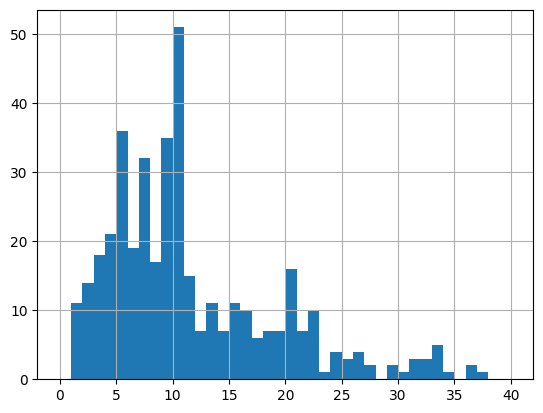

In [13]:
# Plot YearsAtCompany from attrition_pop as a histogram
attrition_pop['YearsAtCompany'].hist(bins=np.arange(0, 41, 1))
plt.show()

# Sample 400 employees weighted by YearsAtCompany
attrition_weight = attrition_pop.sample(n=400, weights="YearsAtCompany")

# Plot YearsAtCompany from attrition_weight as a histogram
attrition_weight['YearsAtCompany'].hist(bins=np.arange(0,41,1))
plt.show()

In [14]:
attrition_pop['YearsAtCompany'].mean() , attrition_weight['YearsAtCompany'].mean()

(7.0081632653061225, 11.14)

The weighted sample mean is around 11, which is higher than the population mean of around 7. The fact that the two numbers are different means that the weighted simple random sample is biased.

### Cluster Sampling
_Cluster sampling_ is a two-stage sampling technique that is closely related to stratified sampling. First, you randomly sample which subgroups to include in the sample, then randomly sample rows within each subgroup.

In [15]:
#Stage 1:sampling for subgroups
varieties_pop = list(coffee['variety'].unique())

import random
varieties_samp = random.sample(varieties_pop,k=3)
varieties_samp

['Mundo Novo', 'Pacamara', 'Peaberry']

In [25]:
#Stage 2:Sampling each group
variety_condition = coffee['variety'].isin(varieties_samp)
coffee_cluster = coffee[variety_condition]
coffee_cluster

,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,region,producer,number_of_bags,bag_weight,in_country_partner,harvest_year,grading_date,owner_1,variety,processing_method,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,cupper_points,moisture,category_one_defects,quakers,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
76,85.33,Arabica,essencecoffee,Guatemala,el injerto s.a.,None,el injerto s.a.,11999144,essence coffee,1770,huehuetenango,Arturo Aguirre,36.0,30 kg,Blossom Valley International,2014,"May 23rd, 2015",EssenceCoffee,Pacamara,Natural / Dry,7.83,7.75,7.83,7.67,7.83,8.58,10.00,10.00,10.00,7.83,0.11,0.0,0.0,Green,1.0,"May 22nd, 2016",Blossom Valley International,fc45352eee499d8470cf94c9827922fb745bf815,de73fc9412358b523d3a641501e542f31d2668b0,m,1770.0,1770.0,1770.0
102,85.00,Arabica,nucoffee,Brazil,sitío são geraldo,None,None,002/1251/0242,nucoffee,1100m,grama valley,Idalina M. De Andrade Ferreira,31.0,60 kg,NUCOFFEE,2012,"February 29th, 2012",NUCOFFEE,Mundo Novo,Natural / Dry,8.00,8.00,7.83,7.83,7.67,7.67,10.00,10.00,10.00,8.00,0.12,0.0,0.0,Green,3.0,"February 28th, 2013",NUCOFFEE,567f200bcc17a90070cb952647bf88141ad9c80c,aa2ff513ffb9c844462a1fb07c599bce7f3bb53d,m,1100.0,1100.0,1100.0
103,85.00,Arabica,young kim,Mexico,kassandra,None,None,016-2484-04,None,1400 masl,mexico,Finca Kassandra,1.0,1 kg,Specialty Coffee Association,2010-2011,"April 6th, 2011",Young Kim,Pacamara,None,7.92,8.17,7.75,8.08,7.42,7.83,10.00,10.00,10.00,7.83,0.00,0.0,0.0,None,0.0,"April 5th, 2012",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1400.0,1400.0,1400.0
127,84.67,Arabica,松澤宏樹 koju matsuzawa,Japan,ada farm,MCRKPBG 15/16,ada farm,None,matsuzawa coffee,170,ada okinawa japan,Taijiro TOKUDA,20.0,1 kg,Specialty Coffee Institute of Asia,None,"November 2nd, 2016",松澤宏樹 Koju Matsuzawa,Mundo Novo,Pulped natural / honey,7.75,7.75,7.75,7.42,8.08,7.83,10.00,10.00,10.00,8.08,0.12,0.0,0.0,Green,0.0,"November 2nd, 2017",Specialty Coffee Institute of Asia,726e4891cf2c9a4848768bd34b668124d12c4224,b70da261fcc84831e3e9620c30a8701540abc200,m,170.0,170.0,170.0
147,84.58,Arabica,daniel magu,Kenya,blend,None,sagana,KE 3127,c dorman ltd,1800,nyeri,BLEND,100.0,60 kg,Kenya Coffee Traders Association,2013,"July 21st, 2014",Daniel Magu,Peaberry,Washed / Wet,7.83,7.83,7.83,7.75,7.58,7.83,10.00,10.00,10.00,7.92,0.10,0.0,0.0,Bluish-Green,2.0,"July 21st, 2015",Kenya Coffee Traders Association,ccba45b89d859740b749878be8c6d16fbdb96c2e,d752c909a015f3c76224b3c5cc520f8a67afda74,m,1800.0,1800.0,1800.0
177,84.42,Arabica,maria amalia guadalupe toriello elorza,Mexico,finca la chiripa,None,finca hamburgo,1506545936,finca hamburgo,900,tapachula,MARIA AMALIA GUADALUPE TORIELLO ELORZA,69.0,1 kg,AMECAFE,2012,"June 6th, 2012",MARIA AMALIA GUADALUPE TORIELLO ELORZA,Pacamara,Washed / Wet,7.75,7.92,7.75,7.67,7.83,7.67,10.00,10.00,10.00,7.83,0.12,2.0,0.0,None,4.0,"June 6th, 2013",AMECAFE,59e396ad6e22a1c22b248f958e1da2bd8af85272,0eb4ee5b3f47b20b049548a2fd1e7d4a2b70d0a7,m,900.0,900.0,900.0
225,84.17,Arabica,owen carver,Brazil,café do paraíso,None,café do paraíso,not assigned,café do paraíso,894m - 1183m,"minas gerais, br",Café do Paraíso,1.0,2 kg,Specialty Coffee Association,2012,"May 20th, 2013",Owen Carver,Mundo Novo,Natural / Dry,7.58,7.83,7.75,7.67,7.67,8.00,10.00,10.00,10.00,7.67,0.11,0.0,0.0,Green,3.0,"May 20th, 2014",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,894.0,1183.0,1038.5
259,83.92,Arabica,cafes tomari sa de cv,Mexico,cafetal,101,cafes tomari sa de cv,016-1273-101,cafes tomari sa de cv,1300,veracruz,CAFES TOMARI SA DE CV,200.0,69 kg,Centro Agroecológico del Café A.C.,2017,"July 3rd, 2017",CAFES TOMARI SA DE CV,Mundo Novo,Washed / Wet,7

In [31]:
coffee_cluster['variety']=coffee_cluster['variety'].astype('category')

#to ensure isin filtering removes levels with zero rows
coffee_cluster['variety'] = coffee_cluster['variety'].cat.remove_unused_categories()

In [33]:
coffee_cluster.groupby('variety').sample(n=5,random_state = 2021)

,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,region,producer,number_of_bags,bag_weight,in_country_partner,harvest_year,grading_date,owner_1,variety,processing_method,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,cupper_points,moisture,category_one_defects,quakers,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
483,83.08,Arabica,bourbon specialty coffees,Brazil,None,None,None,002/4542/0477,bourbon specialty coffees,None,chapadão de ferro (cerrado mineiro),None,300.0,60 kg,Brazil Specialty Coffee Association,2015,"April 20th, 2015",BOURBON SPECIALTY COFFEES,Mundo Novo,Natural / Dry,7.42,7.67,7.58,7.50,7.75,7.67,10.00,10.0,10.0,7.50,0.11,0.0,0.0,Green,13.0,"April 19th, 2016",Brazil Specialty Coffee Association,3297cfa4c538e3dd03f72cc4082c54f7999e1f9d,8900f0bf1d0b2bafe6807a73562c7677d57eb980,m,NaN,NaN,NaN
835,81.83,Arabica,gabriel barbara,Brazil,helena,2017/001,copag,02/0143-0/0292,volcafe ltda.,973,monte carmelo,Helena Pingnatti Ricci,200.0,59 kg,Brazil Specialty Coffee Association,2016,"January 20th, 2017",Gabriel Barbara,Mundo Novo,Natural / Dry,7.42,7.50,7.42,7.50,7.42,7.25,10.00,10.0,10.0,7.33,0.11,0.0,1.0,Green,3.0,"January 20th, 2018",Brazil Specialty Coffee Association,3297cfa4c538e3dd03f72cc4082c54f7999e1f9d,8900f0bf1d0b2bafe6807a73562c7677d57eb980,m,973.0,973.0,973.0
1195,79.08,Arabica,juana rodriguez gutierrez,Mexico,las palmas,None,"palo blanco, tlacuilotepec, puebla",1207093598,productores e industrializadores de café orgán...,1100,tlacuilotepec,JUANA RODRIGUEZ GUTIERREZ,10.0,1 kg,AMECAFE,2012,"September 12th, 2012",JUANA RODRIGUEZ GUTIERREZ,Mundo Novo,Washed / Wet,7.25,7.08,6.75,7.33,7.42,7.00,9.33,10.0,10.0,6.92,0.11,0.0,0.0,Green,45.0,"September 12th, 2013",AMECAFE,59e396ad6e22a1c22b248f958e1da2bd8af85272,0eb4ee5b3f47b20b049548a2fd1e7d4a2b70d0a7,m,1100.0,1100.0,1100.0
431,83.25,Arabica,ernesto rodriguez luna,Mexico,finca teocelo,None,monte blanco,0,finca teocelo,None,veracruz,ERNESTO RODRIGUEZ LUNA,10.0,1 kg,AMECAFE,2012,"August 1st, 2012",ERNESTO RODRIGUEZ LUNA,Mundo Novo,Washed / Wet,7.75,7.58,7.58,7.58,7.50,7.58,10.00,10.0,10.0,7.67,0.13,0.0,0.0,Green,7.0,"August 1st, 2013",AMECAFE,59e396ad6e22a1c22b248f958e1da2bd8af85272,0eb4ee5b3f47b20b049548a2fd1e7d4a2b70d0a7,m,NaN,NaN,NaN
730,82.33,Arabica,nucoffee,Brazil,sitío santa luzia,None,None,002/1251/0243,nucoffee,1100m,grama valley,José Malagutti,16.0,60 kg,NUCOFFEE,2012,"April 11th, 2012",NUCOFFEE,Mundo Novo,Natural / Dry,7.58,7.50,7.42,7.50,7.50,7.42,10.00,10.0,10.0,7.42,0.12,0.0,0.0,Green,2.0,"April 11th, 2013",NUCOFFEE,567f200bcc17a90070cb952647bf88141ad9c80c,aa2ff513ffb9c844462a1fb07c599bce7f3bb53d,m,1100.0,1100.0,1100.0
369,83.50,Arabica,gabriel bernardo rivas ross,Mexico,la corralera,None,dos puentes de finca kassandra,2484,None,1400,totutla,GABRIEL BERNARD RIVAS ROSS,15.0,1 kg,AMECAFE,2012,"July 11th, 2012",GABRIEL BERNARDO RIVAS ROSS,Pacamara,Washed / Wet,7.75,7.67,7.67,7.75,7.33,7.50,10.00,10.0,10.0,7.83,0.12,0.0,0.0,Green,0.0,"July 11th, 2013",AMECAFE,59e396ad6e22a1c22b248f958e1da2bd8af85272,0eb4ee5b3f47b20b049548a2fd1e7d4a2b70d0a7,m,1400.0,1400.0,1400.0
1276,75.50,Arabica,juana rodriguez gutierrez,Mexico,la joya,None,"palo blanco, tlacuilotepec, puebla",1207093598,productores e industrializadores de café orgán...,1100,tlacuilotepec,JUANA RODRIGUEZ GUTIERREZ,10.0,1 kg,AMECAFE,2012,"September 12th, 2012",JUANA RODRIGUEZ GUTIERREZ,Pacamara,Washed / Wet,7.50,7.25,6.92,7.00,7.17,6.83,8.00,8.0,10.0,6.83,0.11,4.0,0.0,Green,20.0,"September 12th, 2013",AMECAFE,59e396ad6e22a1c22b248f958e1da2bd8af85272,0eb4ee5b3f47b20b049548a2fd1e7d4a2b70d0a7,m,1100.0,1100.0,1100.0
966,81.25,Arabica,essencecoffee,Guatemala,el injerto s.a.,None,el injerto s.a.,11999144,essence coffee,1700m,huehuetenango,El Injerto S.A.,36.0,55 lbs,Blossom Valley International,201

### Performing cluster sampling for attrition_pop

In [35]:
# Create a list of unique JobRole values
job_roles_pop = list(attrition_pop['JobRole'].unique())

# Randomly sample four JobRole values
job_roles_samp = random.sample(job_roles_pop, k=4)

# Filter for rows where JobRole is in job_roles_samp
jobrole_condition = attrition_pop['JobRole'].isin(job_roles_samp)
attrition_filtered = attrition_pop[jobrole_condition]

# Remove categories with no rows
attrition_filtered['JobRole'] = attrition_filtered['JobRole'].cat.remove_unused_categories()

# Randomly sample 10 employees from each sampled job role
attrition_clust = attrition_filtered.groupby('JobRole').sample(n=10,random_state=2022)


# Print the sample
attrition_clust

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1124,36,0.0,Travel_Rarely,1396,Research_Development,5,College,Life_Sciences,Very_High,Male,62,High,2,Laboratory_Technician,Medium,Single,5914,9945,8,No,16,Excellent,Very_High,0,16,3,Best,13,11,3,7
576,45,0.0,Travel_Rarely,974,Research_Development,1,Master,Medical,Very_High,Female,91,High,1,Laboratory_Technician,Very_High,Divorced,2270,11005,3,No,14,Excellent,Very_High,2,8,2,Better,5,3,0,2
995,42,0.0,Travel_Frequently,748,Research_Development,9,College,Medical,Low,Female,74,High,1,Laboratory_Technician,Very_High,Single,3673,16458,1,No,13,Excellent,High,0,12,3,Better,12,9,5,8
1243,50,0.0,Travel_Rarely,1207,Research_Development,28,Below_College,Medical,Very_High,Male,74,Very_High,1,Laboratory_Technician,High,Married,3221,3297,1,Yes,11,Excellent,High,3,20,3,Better,20,8,3,8
869,45,0.0,Travel_Rarely,1015,Research_Development,5,Doctor,Medical,High,Female,50,Low,2,Laboratory_Technician,Low,Single,5769,23447,1,Yes,14,Excellent,Low,0,10,3,Better,10,7,1,4
599,33,0.0,Travel_Rarely,1099,Research_Development,4,Master,Medical,Low,Female,82,Medium,1,Laboratory_Technician,Medium,Married,3838,8192,8,No,11,Excellent,Very_High,0,8,5,Better,5,4,0,2
117,24,0.0,Travel_Rarely,350,Research_Development,21,College,Technical_Degree,High,Male,57,Medium,1,Laboratory_Technician,Low,Divorced,2296,10036,0,No,14,Excellent,Medium,3,2,3,Better,1,1,0,0
472,30,0.0,Travel_Rarely,921,Research_Development,1,Bachelor,Life_Sciences,Very_High,Male,38,Low,1,Laboratory_Technician,High,Married,3833,24375,3,No,21,Outstanding,High,2,7,2,Better,2,2,0,2
149,27,0.0,Non-Travel,1277,Research_Development,8,Doctor,Life_Sciences,Low,Male,87,Low,1,Laboratory_Technician,High,Married,4621,5869,1,No,19,Excellent,Very_High,3,3,4,Better,3,2,1,2
49,20,1.0,Travel_Rarely,129,Research_Development,4,Bachelor,Technical_Degree,Low,Male,84,High,1,Laboratory_Technician,Low,Single,2973,13008,1,No,19,Excellent,Medium,0,1,2,Better,1,0,0,0


### 3 kinds of sampling

In [36]:
# Perform simple random sampling to get 0.25 of the population
attrition_srs = attrition_pop.sample(frac=0.25,random_state = 2022)

# Perform stratified sampling to get 0.25 of each relationship group
attrition_strat = attrition_pop.groupby('RelationshipSatisfaction').sample(frac=0.25,random_state=2022)

In [40]:
# Create a list of unique RelationshipSatisfaction values
satisfaction_unique = list(attrition_pop['RelationshipSatisfaction'].unique())

# Randomly sample 2 unique satisfaction values
satisfaction_samp = random.sample(satisfaction_unique,k=2)

# Filter for satisfaction_samp and clear unused categories from RelationshipSatisfaction
satis_condition = attrition_pop['RelationshipSatisfaction'].isin(satisfaction_samp)
attrition_clust_prep = attrition_pop[satis_condition]
attrition_clust_prep['RelationshipSatisfaction'] = attrition_clust_prep['RelationshipSatisfaction'].cat.remove_unused_categories()

#Perform cluster sampling on the selected group, getting 0.25 of attrition_pop
attrition_clust = attrition_clust_prep.groupby('RelationshipSatisfaction').sample(n=len(attrition_pop)//4,random_state=2022)

### Comparing point estimates

In [41]:
# Mean Attrition by RelationshipSatisfaction group
mean_attrition_pop = attrition_pop.groupby('RelationshipSatisfaction')['Attrition'].mean()

# Print the result
print(mean_attrition_pop)

RelationshipSatisfaction
Low          0.206522
Medium       0.148515
High         0.154684
Very_High    0.148148
Name: Attrition, dtype: float64


In [42]:
# Calculate the same thing for the simple random sample 
mean_attrition_srs = attrition_srs.groupby('RelationshipSatisfaction')['Attrition'].mean()

# Print the result
print(mean_attrition_srs)

RelationshipSatisfaction
Low          0.134328
Medium       0.164179
High         0.160000
Very_High    0.155963
Name: Attrition, dtype: float64


In [43]:
# Calculate the same thing for the stratified sample 
mean_attrition_strat = attrition_strat.groupby('RelationshipSatisfaction')['Attrition'].mean()

# Print the result
print(mean_attrition_strat)

RelationshipSatisfaction
Low          0.144928
Medium       0.078947
High         0.165217
Very_High    0.129630
Name: Attrition, dtype: float64


In [44]:
# Calculate the same thing for the cluster sample 
mean_attrition_clust = attrition_clust.groupby('RelationshipSatisfaction')['Attrition'].mean()

# Print the result
print(mean_attrition_clust)

RelationshipSatisfaction
High         0.149864
Very_High    0.160763
Name: Attrition, dtype: float64


# Bootstrap Distributions

_Sampling:_ going from a population to a smaller sample

_Bootstrapping:_ building up a theoretical population from the sample

### Bootstrapping coffee mean flavor

In [9]:
import numpy as np
mean_flavor = []
for i in range(1000):
    #bootstrapping
    coffee_resample = coffee.sample(frac=1,replace=True) #sampling whole data but replace = True
    mean_flavor.append(coffee_resample['flavor'].mean())

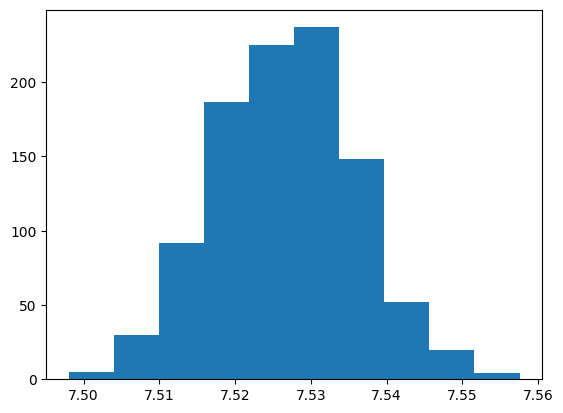

In [10]:
import matplotlib.pyplot as plt
#plotting bootstrap distribution
plt.hist(mean_flavor)
plt.show()

The bootstrap distribution is similar to normal distribution

### Confidence Intervals

In [17]:
spotify_sample = spotify_population.sample(n=5000)
bootstrap_distribution = [] 
for i in range(2000):
    bootstrap_distribution.append(spotify_sample.sample(frac=1,replace=True)['popularity'].mean())

In [18]:
# Generate a 95% confidence interval using the quantile method
lower_quant = np.quantile(bootstrap_distribution,0.025)
upper_quant = np.quantile(bootstrap_distribution,0.975)

# Print quantile method confidence interval
print((lower_quant, upper_quant))

(54.67418, 55.267665)


In [19]:
from scipy.stats import norm

# Find the mean and std dev of the bootstrap distribution
point_estimate = np.mean(bootstrap_distribution)
standard_error = np.std(bootstrap_distribution,ddof=1)

# Find the lower limit of the confidence interval
lower_se = norm.ppf(0.025,loc=point_estimate,scale=standard_error)

# Find the upper limit of the confidence interval
upper_se = norm.ppf(0.975,loc=point_estimate,scale=standard_error)

# Print standard error method confidence interval
print((lower_se, upper_se))

(54.662764323960296, 55.26123047603971)


# Final note
- The std.deviation of a bootstrap statistic is a good approximation of the standard error
- Can assume bootstrap distributions are normally distributed for confidence intervals